In [ ]:
!pip install keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import gdown
import zipfile
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, MaxPool2D, Activation, Input, Flatten, Rescaling, concatenate, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.layers import Lambda
from tensorflow.keras import activations
from keras.datasets import cifar10
from keras.preprocessing.image import load_img
from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist
import keras_tuner
from kerastuner.tuners import BayesianOptimization

# **Load MNIST Dataset**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(f"shape of x_train: {x_train.shape}")

shape of x_train: (60000, 28, 28)


# **Plot 5 images from Train and Test Datas**

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


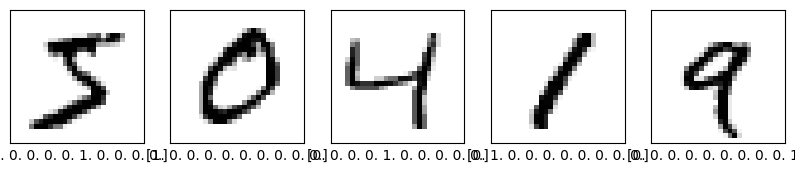

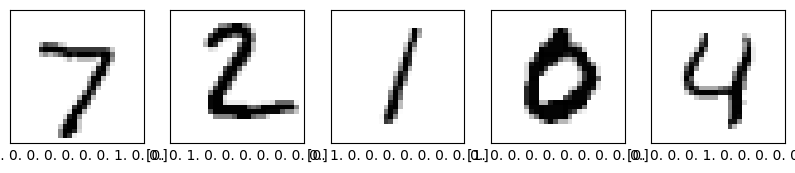

In [ ]:
# plot the first 5 images in the training set
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(y_test[i])
plt.show()

# **Define Model**

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.Input(shape=(28,28,1)))
    for i in range(hp.Int('j', min_value=0, max_value=5, step=1)):
        model.add(layers.Conv2D(hp.Int('filters', min_value=32, max_value=256, step=16), kernel_size=3, activation='relu'))
        # model.add(layers.MaxPooling2D(pool_size=2))

    model.add(layers.Dropout(0.5))

    model.add(layers.Flatten())

    for i in range(hp.Int('j', min_value=0, max_value=4, step=1)):
        model.add(layers.Dense(hp.Int('units', min_value=32, max_value=256, step=16), activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
tuner = keras_tuner.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3)

tuner.search_space_summary()

Reloading Tuner from ./untitled_project/tuner0.json
Search space summary
Default search space size: 4
j (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 16, 'sampling': 'linear'}
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 16, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
best_model = tuner.get_best_models()[0]

Trial 26 Complete [00h 05m 23s]
val_accuracy: 0.9775999784469604

Best val_accuracy So Far: 0.9907000064849854
Total elapsed time: 00h 58m 46s


In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 64)        36928     
                                                                 
 dropout (Dropout)           (None, 18, 18, 64)        0         
                                                                 
 flatten (Flatten)           (None, 20736)             0